In [44]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [45]:
# Download necessary NLP data
nltk.download('stopwords')
nltk.download('wordnet')

# Load Datasets
fake_df = pd.read_csv("datasets/Fake.csv")
true_df = pd.read_csv("datasets/True.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaduv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yaduv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
# Assign Labels (Fake = 0, True = 1)
fake_df['label'] = 0
true_df['label'] = 1

In [47]:
# Combine Both Datasets
df = pd.concat([fake_df, true_df])
df.drop_duplicates(inplace=True)
df = df[['title', 'text', 'label']]
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle Dataset

In [48]:
# Text Preprocessing Function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)

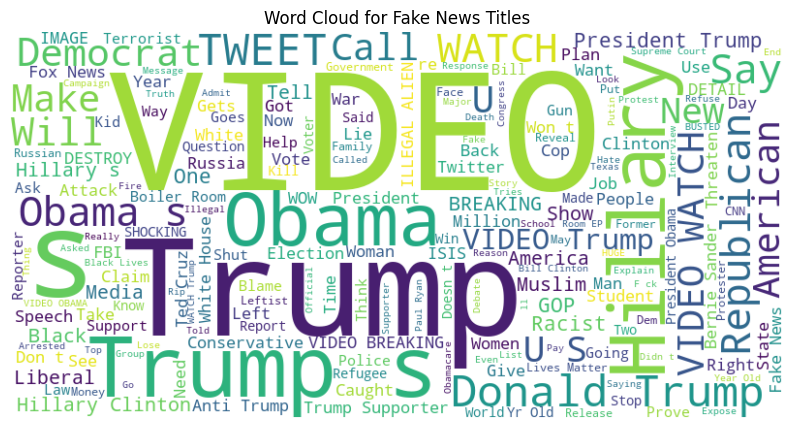

In [49]:
# Word Cloud Visualization for Fake News
fake_titles = ' '.join(df[df['label'] == 0]['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Titles')
plt.axis('off')
plt.show()

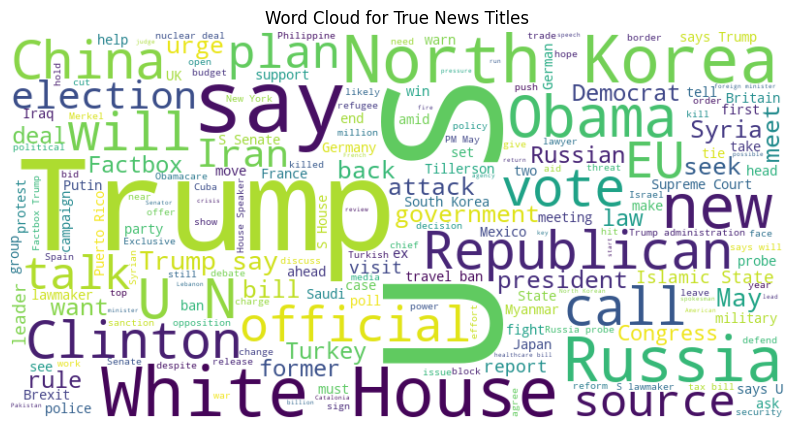

In [50]:
# Word Cloud Visualization for True News
true_titles = ' '.join(df[df['label'] == 1]['title'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News Titles')
plt.axis('off')
plt.show()

In [51]:
# Convert Text Data to Numerical Features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

# Save Vectorizer
joblib.dump(vectorizer, "datasets/vectorizer.pkl")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Save Model
joblib.dump(model, "datasets/fake_news_model.pkl")

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9348847616916536

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4710
           1       0.94      0.93      0.93      4228

    accuracy                           0.93      8938
   macro avg       0.93      0.93      0.93      8938
weighted avg       0.93      0.93      0.93      8938



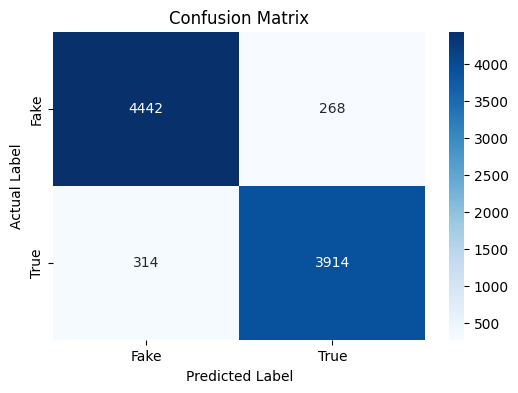

In [52]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [53]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

In [54]:
def predict_news(text):
    text_cleaned = clean_text(text)  # Preprocess text
    vectorized_text = vectorizer.transform([text_cleaned]).toarray()  # Convert to TF-IDF
    prediction = model.predict(vectorized_text)[0]  # Predict (0 = Fake, 1 = True)

    if prediction == 0:
        print("❌ Fake News Detected!")
    else:
        print("✅ This News is True!")

news_input = """Donald Trump wins the 2024 US Presidential Elections, defeating Joe Biden in a historic landslide victory!"""
predict_news(news_input)

❌ Fake News Detected!
